In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import sklearn
from sklearn import datasets, pipeline, preprocessing
import numpy as np
import pandas as pd

# Load NAM (or just copy-paste)

In [3]:
%run NAM.py

# Load data

In [4]:
x,y = sklearn.datasets.load_breast_cancer(as_frame=True, return_X_y=True)
y = 1-y


# torch wants actual floats, not doubles which pandas defaults to
x = x.astype(np.float32)
y = y.to_frame().astype(np.float32)

# Train

  epoch    train_AUPRC    train_AUROC    train_loss    valid_AUPRC    valid_AUROC    valid_acc    valid_loss     dur
-------  -------------  -------------  ------------  -------------  -------------  -----------  ------------  ------
      1         0.2917         0.3398        0.7316         0.9472         0.9640       0.8509        0.3817  0.1483
      2         0.9460         0.9571        0.4014         0.9424         0.9643       0.9035        0.2916  0.1963
      3         0.9741         0.9807        0.2549         0.9569         0.9718       0.9035        0.2300  0.2033
      4         0.9753         0.9821        0.1979         0.9660         0.9771       0.8860        0.1908  0.1956
      5         0.9833         0.9873        0.1476         0.9734         0.9817       0.8860        0.1720  0.2025
      6         0.9873         0.9904        0.1310         0.9779         0.9849       0.9123        0.1515  0.2045
      7         0.9917         0.9940        0.1051         0.98

     69         0.9992         0.9995        0.0284         0.9957         0.9971       0.9737        0.0688  0.1947
     70         0.9986         0.9991        0.0381         0.9965         0.9977       0.9649        0.0661  0.1899
     71         0.9997         0.9998        0.0227         0.9965         0.9977       0.9649        0.0649  0.1812
     72         0.9995         0.9997        0.0259         0.9965         0.9977       0.9649        0.0647  0.1991
     73         0.9995         0.9997        0.0231         0.9965         0.9977       0.9649        0.0656  0.1970
     74         0.9994         0.9996        0.0261         0.9965         0.9977       0.9649        0.0646  0.1552
     75         0.9997         0.9998        0.0228         0.9965         0.9977       0.9737        0.0671  0.1805
     76         0.9994         0.9996        0.0264         0.9965         0.9977       0.9825        0.0659  0.2037
     77         0.9995         0.9997        0.0216         0.99

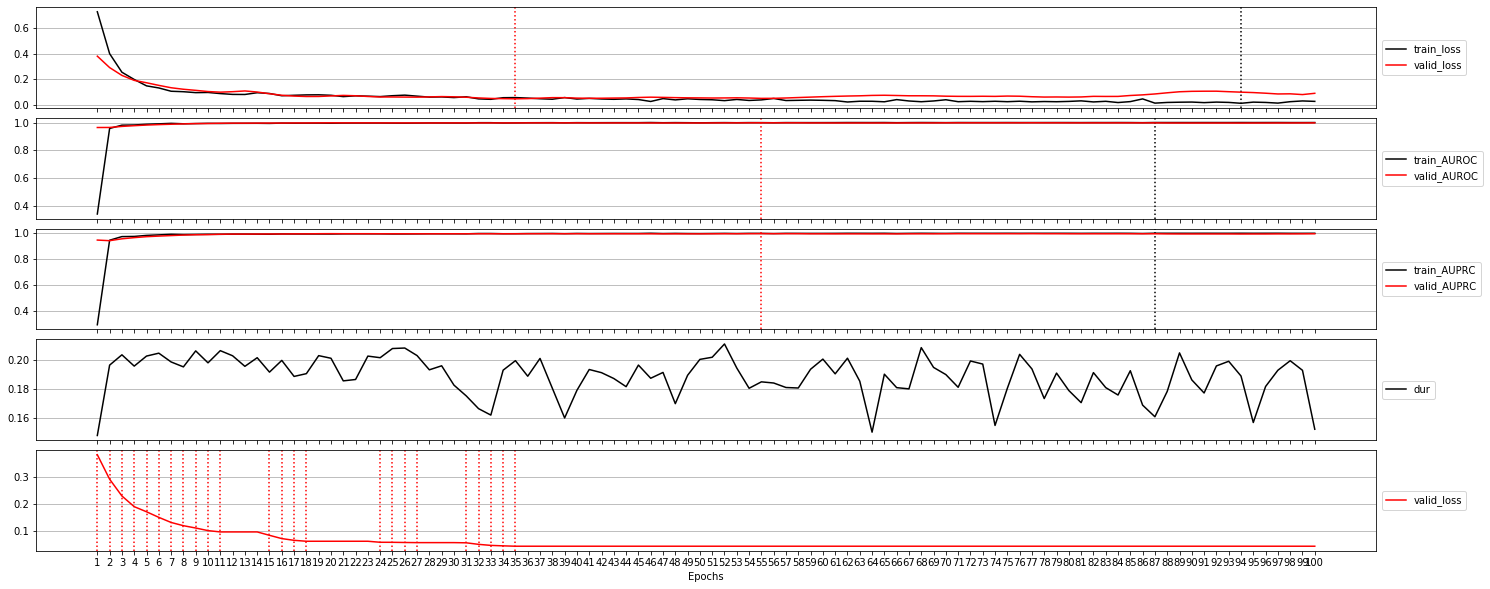

In [5]:
# simple pipeline with scaling and NAM

model = sklearn.pipeline.Pipeline([
    ('Scaler', sklearn.preprocessing.StandardScaler()),
    ('clf', NAMClassifier(x.shape[1], n_layers= (64,64,64), max_epochs=100, es=False, lr = 3e-3, p_dropout=0.25)),
])
_ = model.fit(x.values,y.values)

# Visualize non-linear contribution 

In [6]:
# Load feature contribution through the "transform" interface

contrib=pd.DataFrame(model.transform(x.values),columns=x.columns)

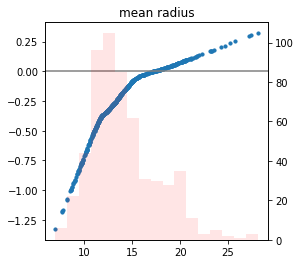

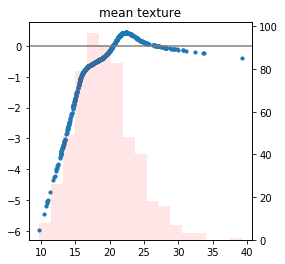

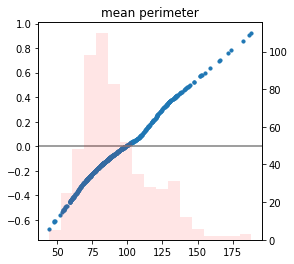

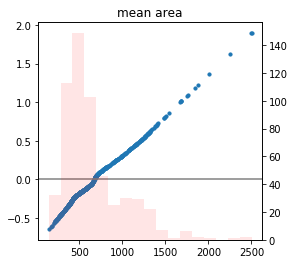

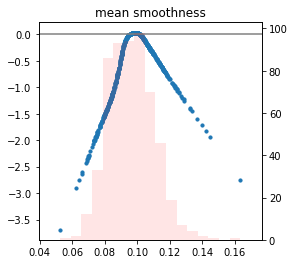

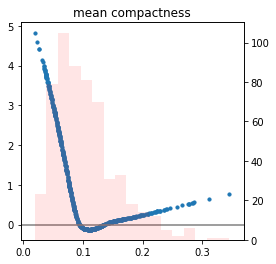

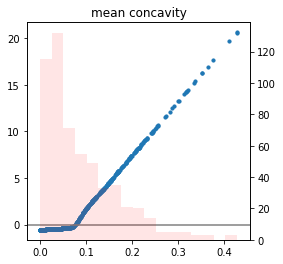

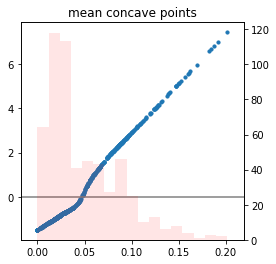

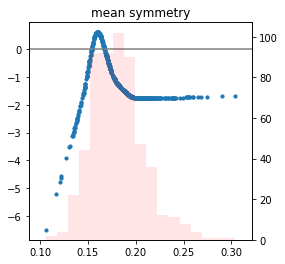

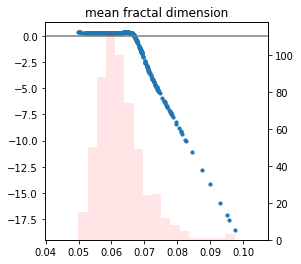

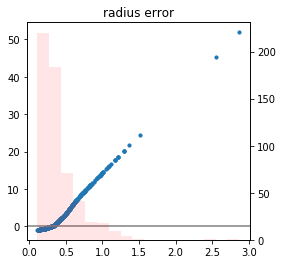

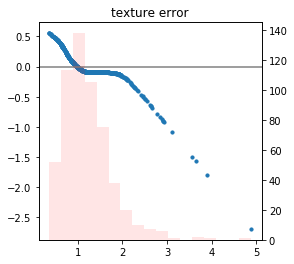

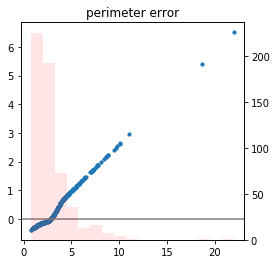

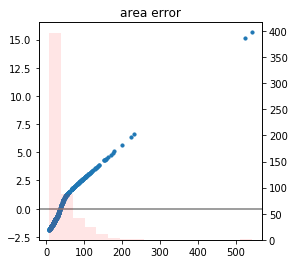

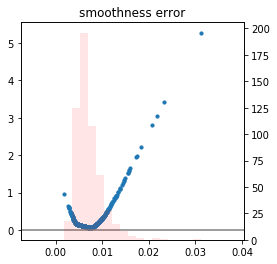

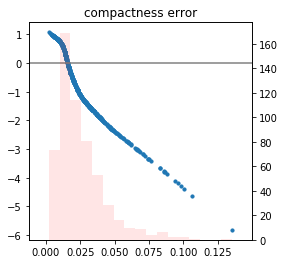

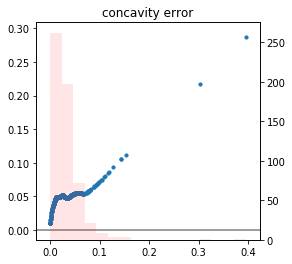

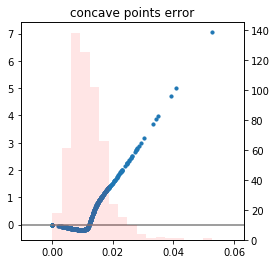

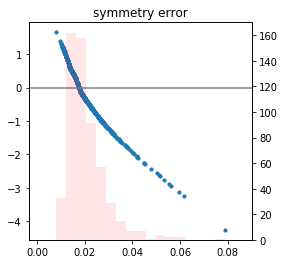

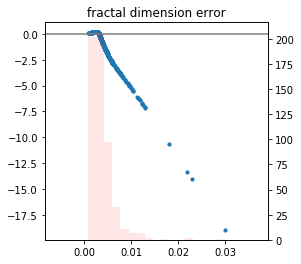

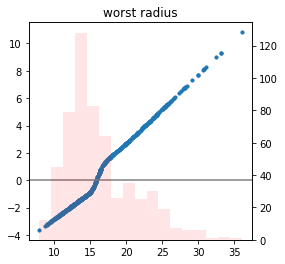

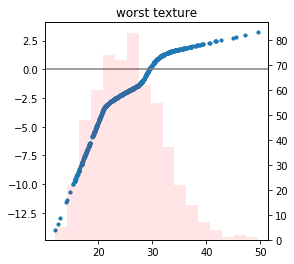

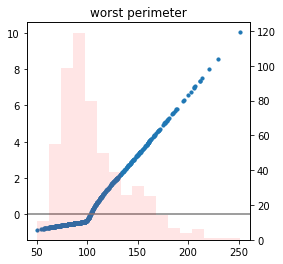

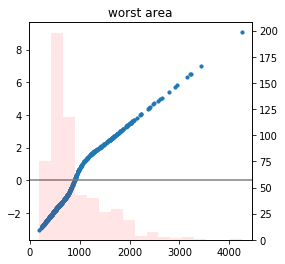

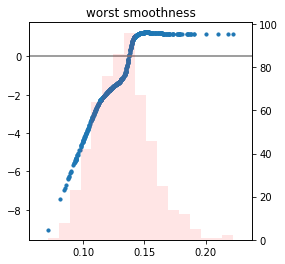

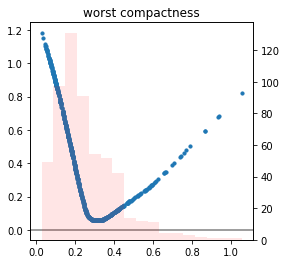

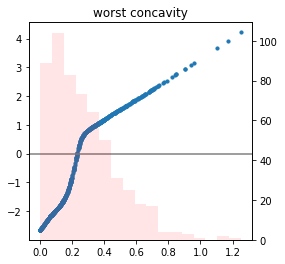

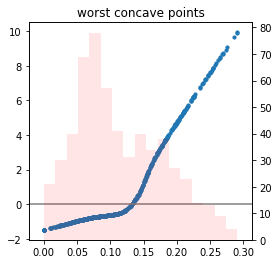

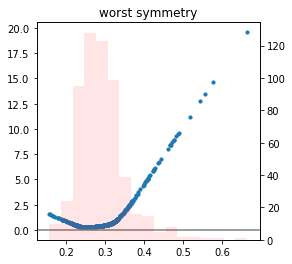

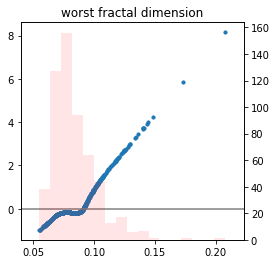

In [7]:
# plot value vs. contribution

for col in x.columns:
    fig,axs = plt.subplots(figsize=(4,4))
    axs.axhline(0, color='grey')
    axs.scatter(x[col], contrib[col], s=10)
    axs.set_title(col)
    twinx = axs.twinx()
    twinx.hist(x[col], color='red', alpha=0.1, bins='rice')
    plt.show()